# Explore here

## Step 1: Problem statement and data collection

Problem statement: calculate, based on the physiological data of customers what will be the health insurance premium (cost) to be borne by each of them

In [ ]:
# Import dataset to start working with it
import pandas as pd

raw_data = pd.read_csv("../medical_insurance_cost.csv", sep=",")

## Step 2: Exploration and data cleaning

In [3]:
print(f"Raw data shape: {raw_data.shape}")
print(raw_data.info())

Raw data shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Unlike a prior exercise, doesn't look as though any of our columns have missing data at all, which simplifies matters.

I don't see a column for ID in here, and the rest of the data points seem generic enough that it's plausible to me we'd have multiple identical-seeming rows sourced from separate actual people, so am skipping the duplicate-finding-and-dropping step we did for a previous EDA.

In [4]:
print(raw_data.shape)
raw_data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# remove data considered irrelevant
# raw_data.drop(
#    ["id"],
#    axis=1,
#    inplace=True,
# )
# skipping this because as of yet, none of the columns in the raw dataset look strictly-irrelevant to me


raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 3: Analysis of univariate variables
### categorical variables
Categorical, non-numeric variables in this dataframe include: sex, smoker, region

All of these are plausible to me as relevant.

In [ ]:
categorical_variables = ["sex", "smoker", "region"]

for each_categorical_variable in categorical_variables:
    print(f"\n\t{each_categorical_variable}s:")
    for each_possible_value in sorted(
        raw_data[f"{each_categorical_variable}"].unique()
    ):
        print(each_possible_value)


	sexs:
female
male

	smokers:
no
yes

	regions:
northeast
northwest
southeast
southwest


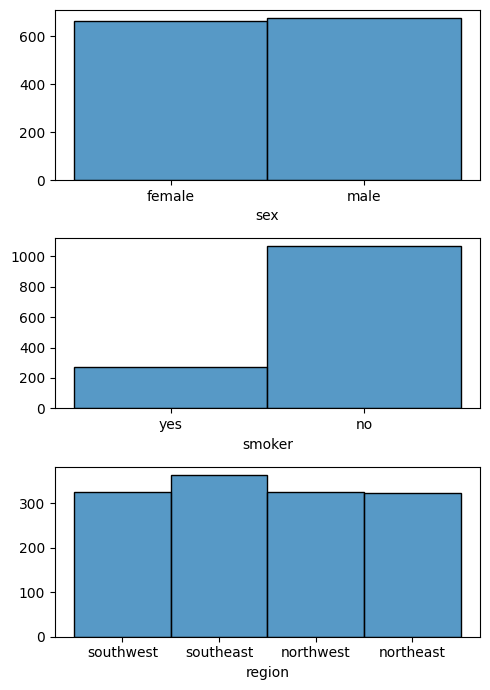

In [15]:
# histogram-plot each categorical variable

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, figsize=(5, 7))

# Create a multiple histogram
sns.histplot(ax=axis[0], data=raw_data, x="sex").set(ylabel=None)
sns.histplot(ax=axis[1], data=raw_data, x="smoker").set(ylabel=None)
sns.histplot(ax=axis[2], data=raw_data, x="region").set(ylabel=None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- Relatively even proportions of men and women represented, and across most regions except a few more from southeast
- unfortunate that there are so many smokers still, but oh well.

### numeric variables

Numerical, non-categorical variables in the dataset include: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

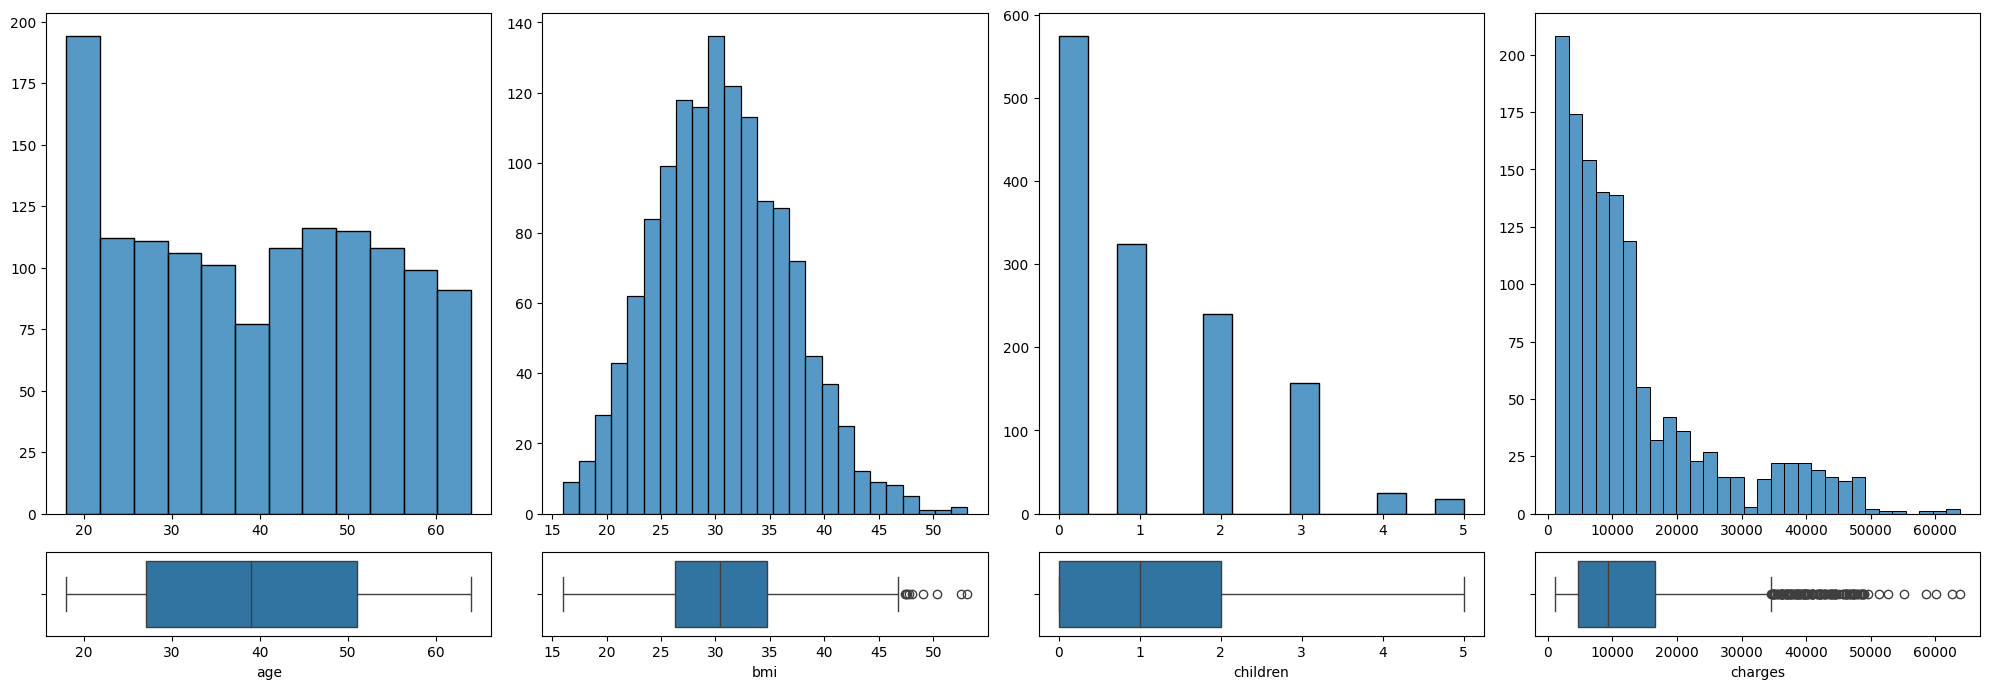

In [20]:
numeric_variables = ["age", "bmi", "children", "charges"]
fig, axis = plt.subplots(
    2, len(numeric_variables), figsize=(20, 7), gridspec_kw={"height_ratios": [6, 1]}
)

# Creating a multiple figure with histograms and box plots
temp_column_index = 0
for each_numeric_variable in numeric_variables:
    sns.histplot(
        ax=axis[0, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    ).set(xlabel=None, ylabel=None)
    sns.boxplot(
        ax=axis[1, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    )
    temp_column_index += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

From this it looks like:
- got a few high-BMI outliers in the above-46 range
- interesting two-cluster distribution between lower-charged individuals and higher-cost (between 30000 and 50000)

## Step 4: Analysis of multivariate variables
### Numerical-numerical analysis


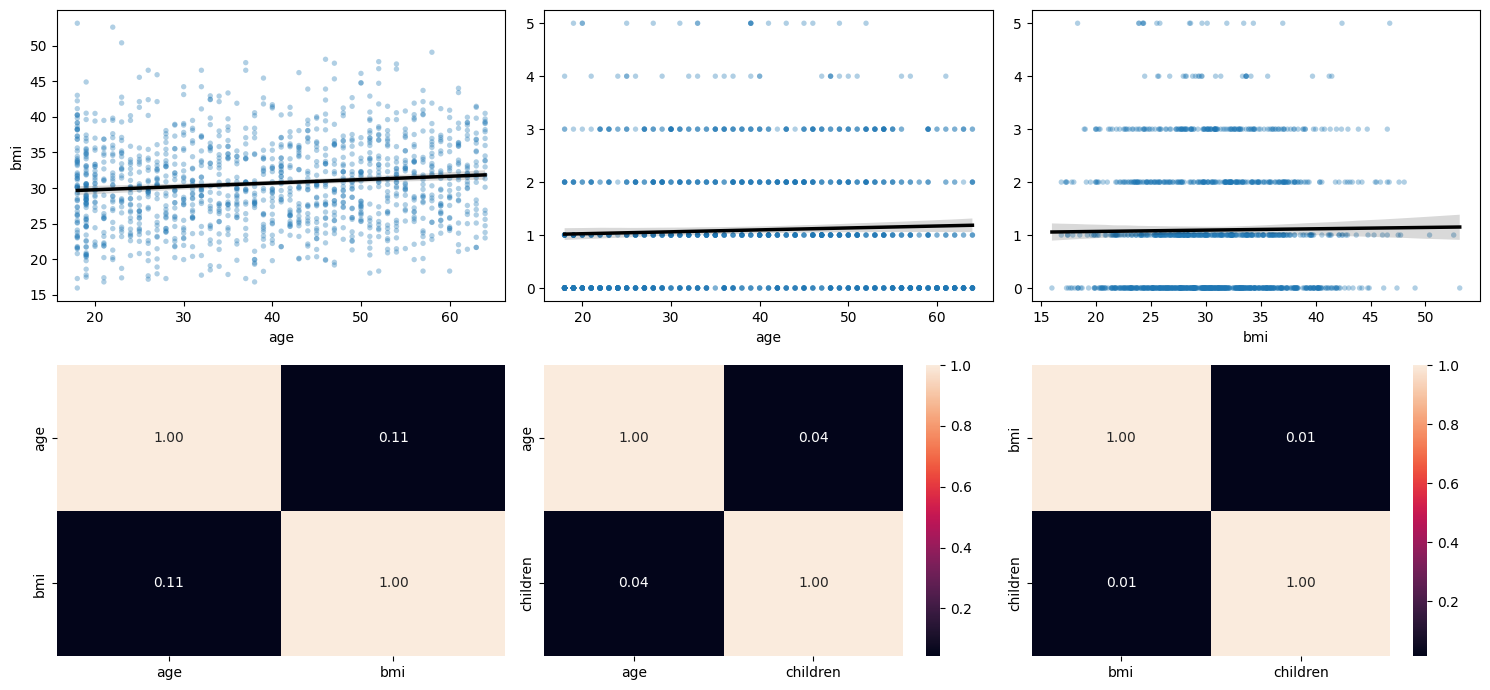

In [22]:
fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Create a multiple scatter diagram
common_scatter = {"s": 15, "alpha": 0.35, "edgecolor": "none"}
common_line = {"color": "black", "lw": 2.5, "zorder": 5}

sns.regplot(
    ax=axis[0, 0],
    data=raw_data,
    x="age",
    y="bmi",
    scatter_kws=common_scatter,
    line_kws=common_line,
)
sns.heatmap(
    raw_data[["age", "bmi"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 0],
    cbar=False,
)

sns.regplot(
    ax=axis[0, 1],
    data=raw_data,
    x="age",
    y="children",
    scatter_kws=common_scatter,
    line_kws=common_line,
).set(ylabel=None)
sns.heatmap(
    raw_data[["age", "children"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 1],
)

sns.regplot(
    ax=axis[0, 2],
    data=raw_data,
    x="bmi",
    y="children",
    scatter_kws=common_scatter,
    line_kws=common_line,
).set(ylabel=None)
sns.heatmap(
    raw_data[["bmi", "children"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 2],
)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- Older people are only slightly more likely to have more children, and are a little more likely to have higher BMI
- people with children are not much more likely to have high BMI.

### categorical-categorical analysis

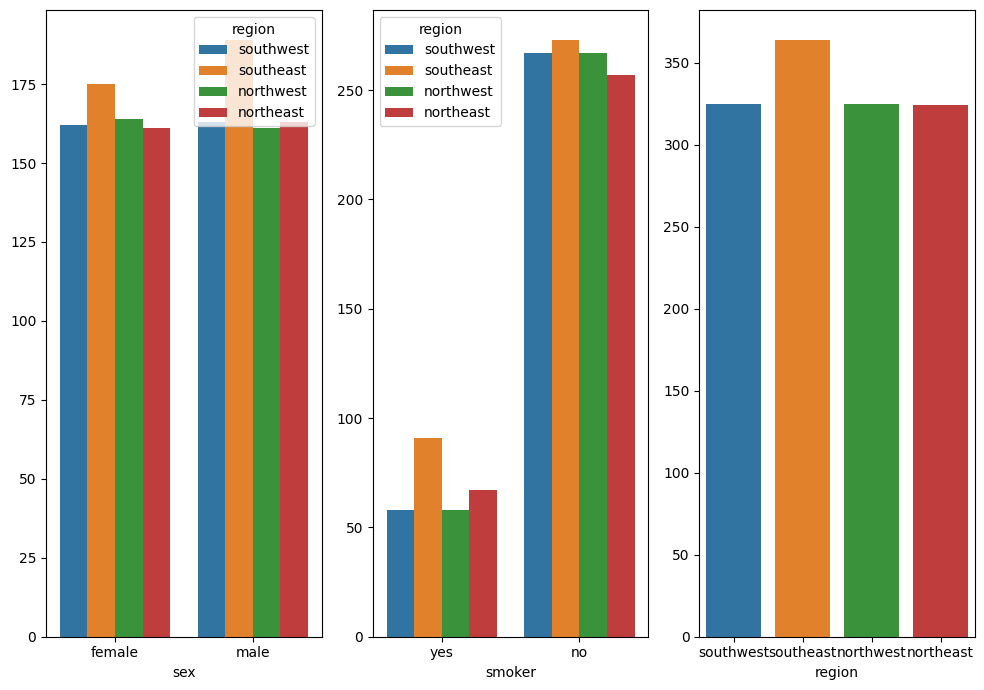

In [ ]:
temp_categorical_variables = (
    categorical_variables.copy()
)  # to avoid wrecking original copy when loop below starts popping them off the front as though a FIFO queue



fig, axis = plt.subplots(1, 3, figsize=(10, 7))

for col in range(3):
    sns.countplot(
        ax=axis[col],  # ← just one index
        data=raw_data,
        x=temp_categorical_variables[col],  # safer than pop/remove
        hue="region",
    ).set(ylabel=None)



plt.tight_layout()



plt.show()

- Not surprising that we have more men, more women, and more smokers, and more nonsmokers in southeast region than others, if we have more people overall recorded from that region than others.
- More intersting to notice northeast smoker count is disproportionately higher compared to other regions.

#### Correlation analysis


['sex', 'smoker', 'region']


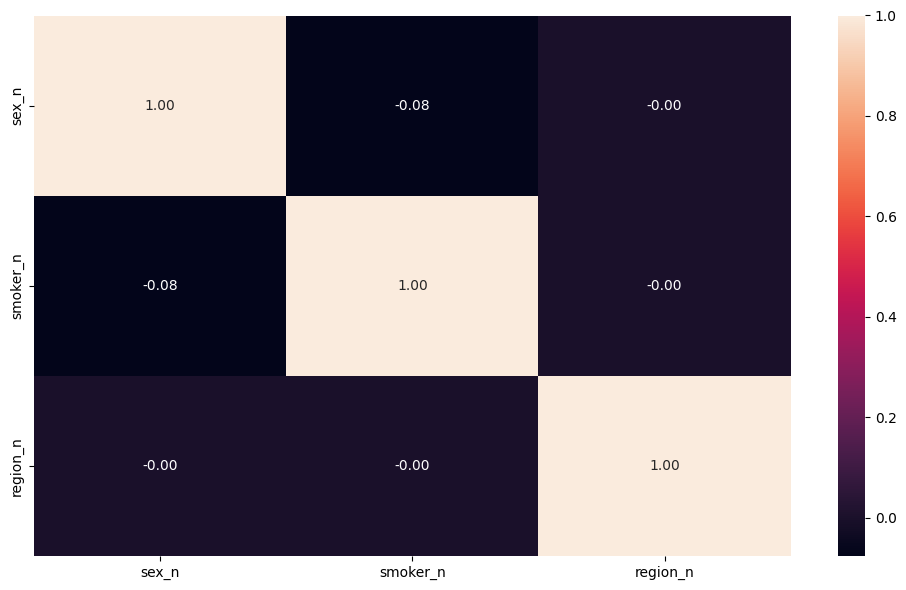

In [38]:
print(categorical_variables)
raw_data["sex_n"] = pd.factorize(raw_data["sex"])[0]
raw_data["smoker_n"] = pd.factorize(raw_data["smoker"])[0]
raw_data["region_n"] = pd.factorize(raw_data["region"])[0]


fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(
    raw_data[
        [
            "sex_n",
            "smoker_n",
            "region_n",
        ]
    ].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()

plt.show()

- One gender seems slightly more likely than the other to be a smoker, but only by -0.08

### numerical-categorical analysis

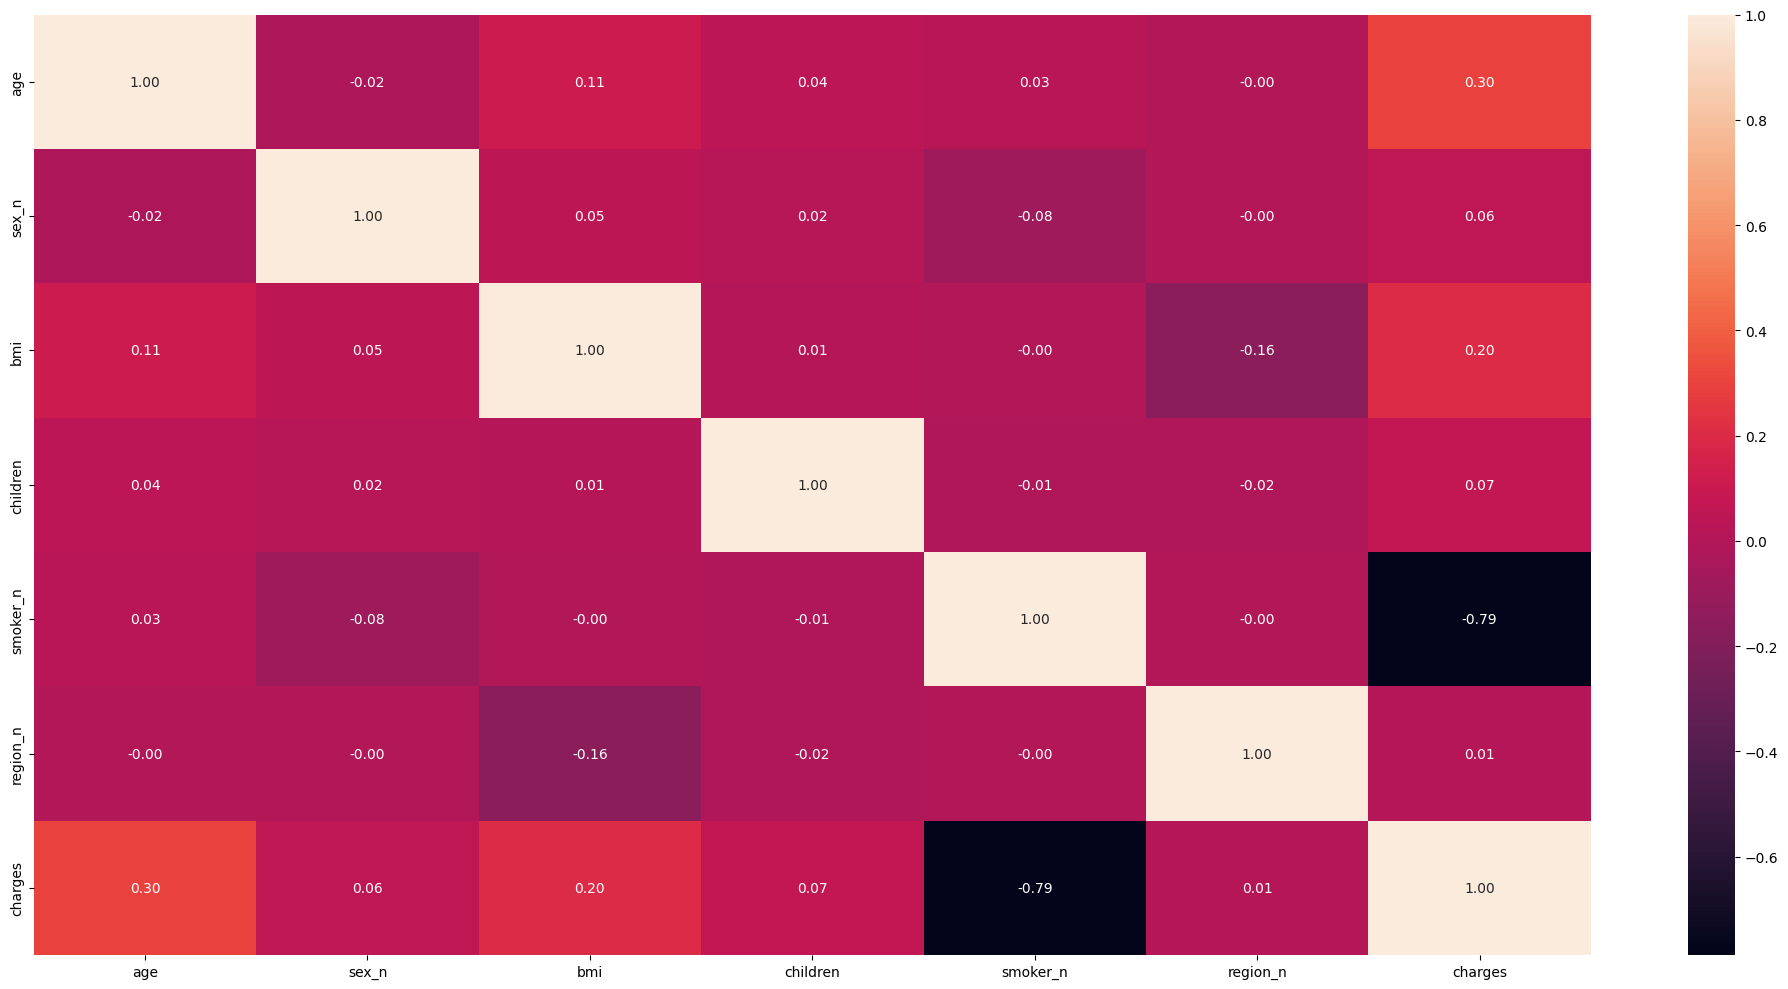

In [40]:
fig, axis = plt.subplots(figsize=(20, 10))

sns.heatmap(
    raw_data[
        [
            "age",
            "sex_n",
            "bmi",
            "children",
            "smoker_n",
            "region_n",
            "charges",
        ]
    ].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()

plt.show()

Based on the above, I'd assess:
- most important factor in charges is whether they're a smoker.  Next most important is age, then bmi.  Effect of region is negligible.
- Quantity of children is less influential than I would've guessed, and am similarly surprised that gender is even less of a factor than quantity of children.
- I would be curious whether there'd be a more noticeable difference if, rather than counting children as a numerical variable, we counted whether or not there are family members in the plan _at all_.  But we don't have data on marital status in this dataset, so at best we could categorize 0 children vs. 1+ children.

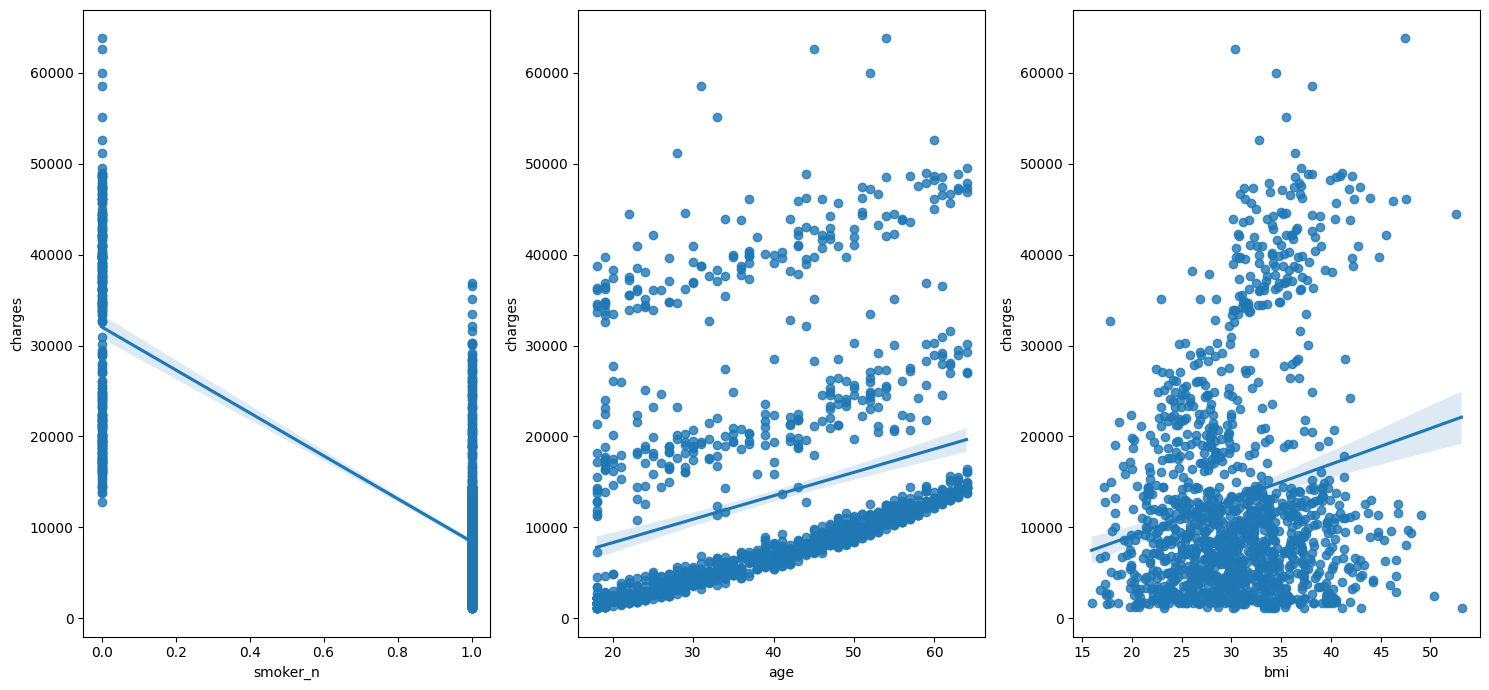

In [41]:
fig, axis = plt.subplots(figsize=(15, 7), ncols=3)

sns.regplot(ax=axis[0], data=raw_data, x="smoker_n", y="charges")
sns.regplot(ax=axis[1], data=raw_data, x="age", y="charges")
sns.regplot(ax=axis[2], data=raw_data, x="bmi", y="charges")

plt.tight_layout()

plt.show()

Based on these regression plots:
- factorizing smokers as 0 and nonsmokers as 1 sounds counterintuitive, but factorizing happened based on which data category appeared first, and we've already seen from head() that the first row is a woman who smokes.
- these charges make it intuitive to call higher age and higher BMI both factors causing higher charges.


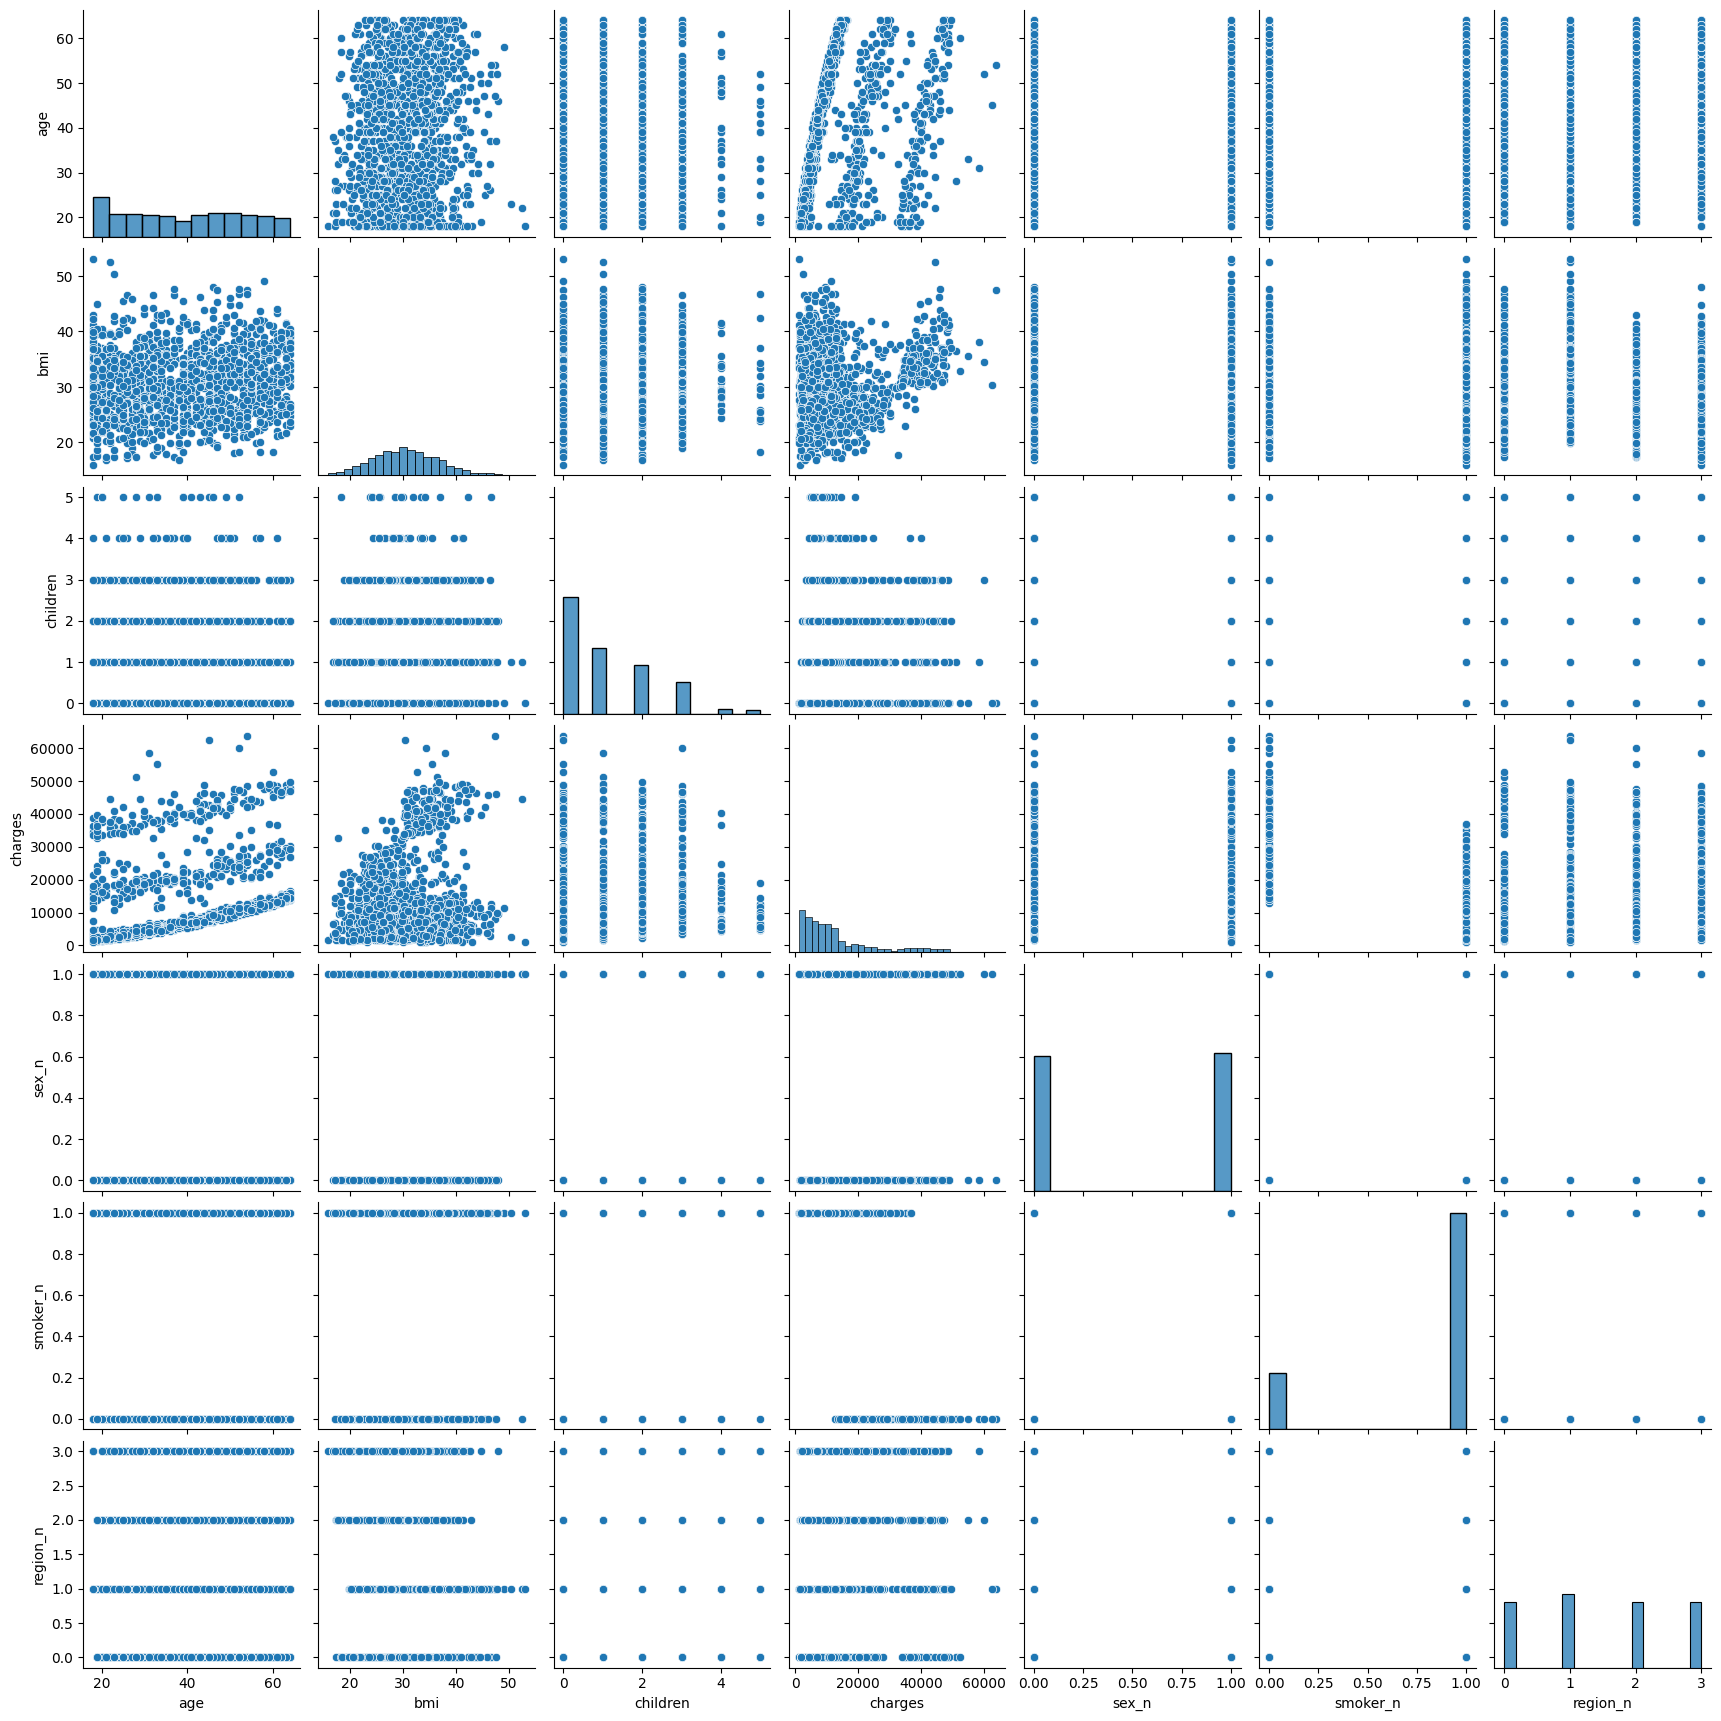

In [42]:
sns.pairplot(data=raw_data)

### Day 2 exercises


In [ ]:
raw_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
count,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.00000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000,41108.000000
mean,40.023572,258.179065,2.566386,962.524837,0.172764,0.082475,93.575868,-40.501983,3.621891,5167.054675,3.671986,0.50579,3.276491,0.209010,0.572127,0.199815,0.634694,2.250778,1.979566,0.169675
std,10.420661,259.219182,2.767601,186.790167,0.494773,1.570760,0.578728,4.627360,1.734276,72.255347,2.452869,0.68874,2.185386,0.406786,0.541223,0.456083,0.481522,2.429334,1.411518,0.455463
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,179.500000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.00000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.00000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,2.00000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000


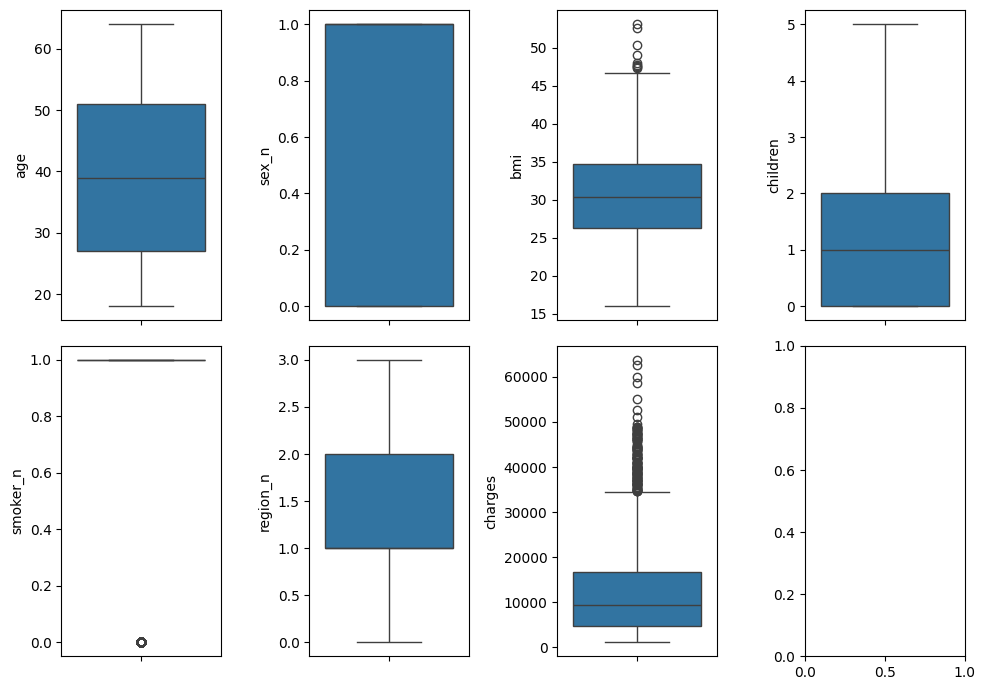

In [ ]:
fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.boxplot(ax=axis[0, 0], data=raw_data, y="age")
sns.boxplot(ax=axis[0, 1], data=raw_data, y="sex_n")
sns.boxplot(ax=axis[0, 2], data=raw_data, y="bmi")
sns.boxplot(ax=axis[0, 3], data=raw_data, y="children")
sns.boxplot(ax=axis[1, 0], data=raw_data, y="smoker_n")
sns.boxplot(ax=axis[1, 1], data=raw_data, y="region_n")
sns.boxplot(ax=axis[1, 2], data=raw_data, y="charges")

plt.tight_layout()

plt.show()

Items affected by outliers: bmi, charges.  Smoker we've already seen the percentage of is non-trivial and I wouldn't describe as an outlier.

Maintain-eliminate-replace decisions: Think I'd keep most of these.  May drop the absolute highest-end BMIs over 50 and the absolute highest-charged customers charged over 55000 based on what I'm seeing in these box plots.

In [48]:
print(raw_data["bmi"].describe())
outlier_threshold = 50  # picked approximately 80th percentile
atypical_bmi = raw_data.query(f"bmi > {outlier_threshold}")
print(atypical_bmi)
raw_data = raw_data.query(
    f"bmi <= {outlier_threshold}"
)  # to drop the outlier rows

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
      age   sex    bmi  children smoker     region     charges  sex_n  \
847    23  male  50.38         1     no  southeast   2438.0552      1   
1047   22  male  52.58         1    yes  southeast  44501.3982      1   
1317   18  male  53.13         0     no  southeast   1163.4627      1   

      smoker_n  region_n  
847          1         1  
1047         0         1  
1317         1         1  


In [51]:
print(raw_data["charges"].describe())
outlier_threshold_price = 55000
expensive_places = raw_data.query(f"charges > {outlier_threshold_price}")
print(expensive_places)
raw_data = raw_data.query(
    f"charges <= {outlier_threshold_price}"
)  # to drop the outlier rows

count     1332.000000
mean     13154.157188
std      11873.624405
min       1121.873900
25%       4744.325050
50%       9369.615750
75%      16486.225762
max      58571.074480
Name: charges, dtype: float64
     age     sex     bmi  children smoker     region      charges  sex_n  \
577   31  female  38.095         1    yes  northeast  58571.07448      0   
819   33  female  35.530         0    yes  northwest  55135.40209      0   

     smoker_n  region_n  
577         0         3  
819         0         2  


#### Feature scaling
##### Splitting training vs test data

In [ ]:
from sklearn.model_selection import train_test_split

num_variables = [
    "age",
    "sex_n",
    "bmi",
    "children",
    "smoker_n",
    "region_n",
    "charges",
]


# We divide the dataset into training and test samples
X = raw_data.drop("y", axis=1)[num_variables]
y = raw_data["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()

,room_type_n,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
4162,1,13795689,2,24,1,318,1,30
45906,2,221200420,30,0,23,311,1,5
24179,1,136646834,2,19,1,0,1,30
37892,2,12211018,2,3,1,0,0,3
40069,2,6096884,3,4,1,87,1,27


In [ ]:
# normalization scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

X_train_norm.head()

,room_type_n,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
4162,-0.910919,-0.684950,-0.294568,0.012900,-0.187651,1.563750,0.248831,-0.000903
45906,0.922925,1.954619,1.401318,-0.523392,0.476839,1.510461,0.248831,-0.718295
24179,-0.910919,0.878535,-0.294568,-0.098827,-0.187651,-0.857081,0.248831,-0.000903
37892,0.922925,-0.705117,-0.294568,-0.456356,-0.187651,-0.857081,-0.930906,-0.775687
40069,0.922925,-0.782930,-0.234001,-0.434010,-0.187651,-0.194778,0.248831,-0.086990


In [ ]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=num_variables)

X_train_scal.head()

,room_type_n,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
4162,0.5,0.050282,0.002747,0.038156,0.000000,0.871233,0.25,0.136986
45906,1.0,0.806353,0.079670,0.000000,0.067485,0.852055,0.25,0.022831
24179,0.5,0.498122,0.002747,0.030207,0.000000,0.000000,0.25,0.136986
37892,1.0,0.044505,0.002747,0.004769,0.000000,0.000000,0.00,0.013699
40069,1.0,0.022217,0.005495,0.006359,0.000000,0.238356,0.25,0.123288


In [ ]:
# feature selection for selecting most-relevant features to use for building ML model

from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 3 features from the 8-column dataset
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(
    selection_model.transform(X_train), columns=X_train.columns.values[ix]
)
X_test_sel = pd.DataFrame(
    selection_model.transform(X_test), columns=X_test.columns.values[ix]
)

X_train_sel.head()

,room_type_n,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_n
0,1,2,1,318,30
1,2,30,23,311,5
2,1,2,1,0,30
3,2,2,1,0,3
4,2,3,1,87,27


In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [ ]:
X_train_sel.to_csv(
    "../data/interim/clean_banking_marketing_campaign.csv",
    index=False,
)
X_test_sel.to_csv("../data/interim/clean_banking_marketing_campaign.csv", index=False)